In [16]:

!pip install kmodes
!pip install fuzzy_c_means 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from fcmeans import FCM
from kmodes.kmodes import KModes

In [2]:
data = pd.read_csv("C:/Users/SCIENCE/Documents/optimize.csv") 
data

,SALES,Price Each,QUANTITYORDERED,COUNTRY,ORDERLINENUMBER
0,5404.62,1700.00,30,USA,2
1,7209.11,600.00,34,France,5
2,7329.06,11.95,41,France,2
3,7374.10,149.99,45,USA,6
4,10993.50,11.95,49,USA,14
...,...,...,...,...,...
2818,NaN,NaN,20,Spain,15
2819,NaN,NaN,29,Finland,1
2820,NaN,NaN,43,Spain,4
2821,NaN,NaN,34,France,1


In [3]:
data.describe()

,SALES,Price Each,QUANTITYORDERED,ORDERLINENUMBER
count,967.000000,967.000000,2823.000000,2823.000000
mean,4053.377104,170.626412,35.092809,6.466171
std,2050.694132,311.571888,9.741443,4.225841
min,640.050000,2.990000,6.000000,1.000000
25%,2494.190000,11.950000,27.000000,3.000000
50%,3761.370000,14.950000,35.000000,6.000000
75%,5325.080000,150.000000,43.000000,9.000000
max,12001.000000,1700.000000,97.000000,18.000000


In [4]:
n=data["Price Each"].replace(np.NaN,172.12)
n.isnull().sum()

0

In [5]:
P=data.SALES.replace(np.NaN,4053)
P.isnull().sum()

0

In [17]:
w = data[["Price Each","SALES"]]
x=w.dropna()
x.isnull().sum()

Price Each    0
SALES         0
dtype: int64

In [18]:

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i, init = "k-means++")
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    import warnings
    warnings.filterwarnings("ignore")

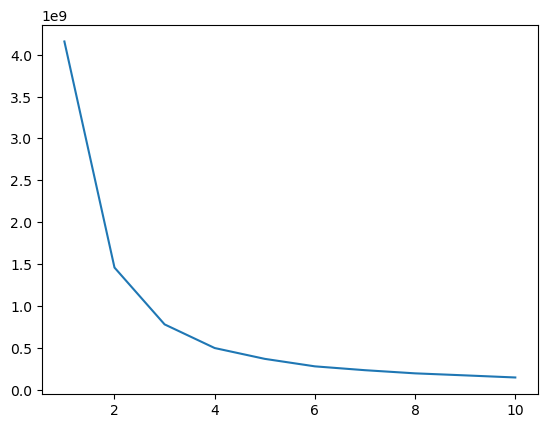

In [19]:
plt.plot(range(1,11), wcss)

In [20]:
model = KMeans(n_clusters = 3, init = "k-means++")
y_pred = kmeans.fit_predict(x)
y_pred[:19]

array([3, 7, 7, 7, 9, 3, 4, 3, 7, 4, 1, 1, 1, 7, 3, 4, 7, 9, 9])

In [31]:
plt.scatter(x[y_pred ==0,0], x[y_pred == 0,1], s =60, c="red", label="customer1")
plt.scatter(x[y_pred ==1,0], x[y_pred == 1,1], s =60, c="blue", label="customer2")
plt.scatter(x[y_pred ==2,0], x[y_pred == 2,1], s =60, c="green", label="customer3")



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],s = 100, c = "black", label = "centroids")
plt.title("Clustering the Quantity According to Country")
plt.xlabel("Quantiy")
plt.ylabel("Country")
plt.legend()
plt.show()

InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False,  True,
       False, False, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True, False,  True, False, False, False, False,  True, False,
        True, False,  True, False, False, False,  True, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True,  True, False, False,  True, False,
        True,  True, False, False,  True, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
        True, False, False, False,  True, False,  True, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False,  True, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False,  True, False,  True, False, False,  True,
        True, False, False,  True]), 0)

In [ ]:
### FUZZY C-MEANS CLUSTERING

In [28]:
fcmModel = FCM(n_clusters = 3)
fcmModel.fit(x)
center = fcmModel.centers
center

ValidationError: 1 validation error for fit
1
  Input should be an instance of ndarray [type=is_instance_of, input_value=     Price Each     SALES...

[967 rows x 2 columns], input_type=DataFrame]
    For further information visit https://errors.pydantic.dev/2.7/v/is_instance_of

In [ ]:
## KMODES CLUSTERING

In [23]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(x)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 1671.0


In [24]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(x)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1699.0


In [25]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(x)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1796.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 1671.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 1561.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 1465.0


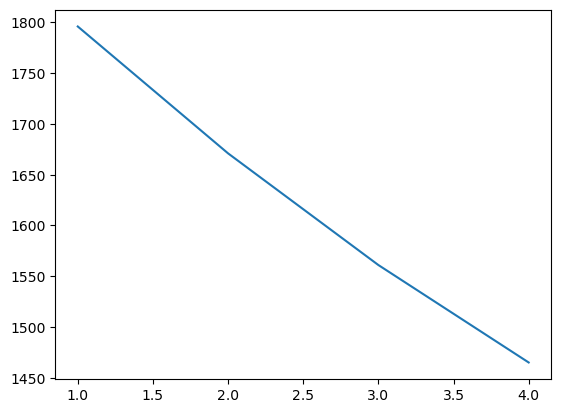

In [26]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost);

In [27]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(x)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 1671.0


In [ ]:
bank_cust = bank_cust.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)